In [1]:
#importing libraries
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import shutil
from PIL import Image

In [2]:
train = pd.read_csv('/kaggle/input/hology/Penyisihan Hology Data Mining/train.csv')
sample = pd.read_csv('/kaggle/input/hology/Penyisihan Hology Data Mining/sample_submission.csv')

In [3]:
train_path = '/kaggle/input/hology/Penyisihan Hology Data Mining/train'
test_path = '/kaggle/input/hology/Penyisihan Hology Data Mining/test'

In [4]:
train_png_path = 'train_png'
if not os.path.exists(train_png_path):
    os.makedirs(train_png_path)

# Ubah semua tipe gambar di 'train_path' menjadi .png dan pindahkan ke 'train_png'
for filename in os.listdir(train_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img = Image.open(os.path.join(train_path, filename))
        new_filename = os.path.splitext(filename)[0] + '.png'
        img.save(os.path.join(train_png_path, new_filename))

In [5]:
# Load dataset
df = train  # Pastikan 'train.csv' mengandung kolom 'id' dan 'warna'

# Path direktori asal dan direktori tujuan
train_path = '/kaggle/working/train_png'
target_base_path = 'sorted_images'

# Membuat direktori baru untuk setiap label jika belum ada
for label in df['warna'].unique():
    new_dir_path = os.path.join(target_base_path, str(label))
    if not os.path.exists(new_dir_path):
        os.makedirs(new_dir_path)

# Pindahkan setiap gambar ke direktori berdasarkan label
for _, row in df.iterrows():
    filename = str(row['id']) + '.png'
    source_path = os.path.join(train_path, filename)
    if os.path.exists(source_path):
        target_path = os.path.join(target_base_path, str(row['warna']), filename)
        shutil.move(source_path, target_path)

print("Gambar telah dipindahkan ke direktori baru sesuai dengan label.")

Gambar telah dipindahkan ke direktori baru sesuai dengan label.


In [6]:
x = '/kaggle/working/sorted_images'
path = Path(x)
path.ls()

(#5) [Path('/kaggle/working/sorted_images/2'),Path('/kaggle/working/sorted_images/1'),Path('/kaggle/working/sorted_images/0'),Path('/kaggle/working/sorted_images/4'),Path('/kaggle/working/sorted_images/3')]

In [14]:
data = ImageDataLoaders.from_folder(path, train = '.', valid_pct=0.2, size=224)
data

In [67]:
learn = vision_learner(data, models.resnet50, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

SuggestedLRs(valley=0.0004786300996784121)

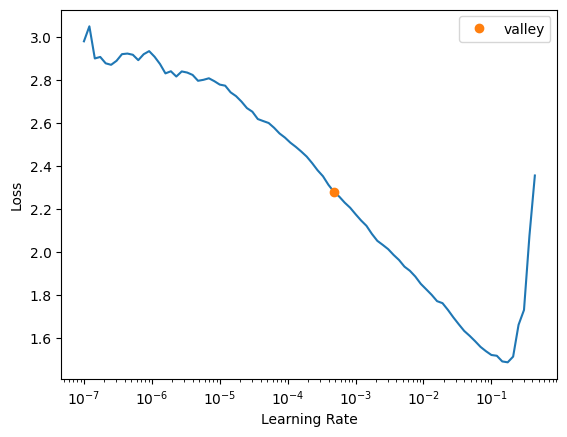

In [56]:
learn.lr_find()

In [68]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(30,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,1.365380,0.920609,0.735484,00:03
1,0.793734,0.375727,0.890323,00:03
2,0.593769,0.282722,0.922581,00:03
3,0.485514,0.177328,0.961290,00:03
4,0.410457,0.410350,0.922581,00:03
5,0.396738,0.446565,0.941935,00:03
6,0.416862,1.290261,0.909677,00:03
7,0.435339,1.308854,0.916129,00:03
8,0.497867,1.556551,0.967742,00:03
9,0.480277,0.488546,0.967742,00:03


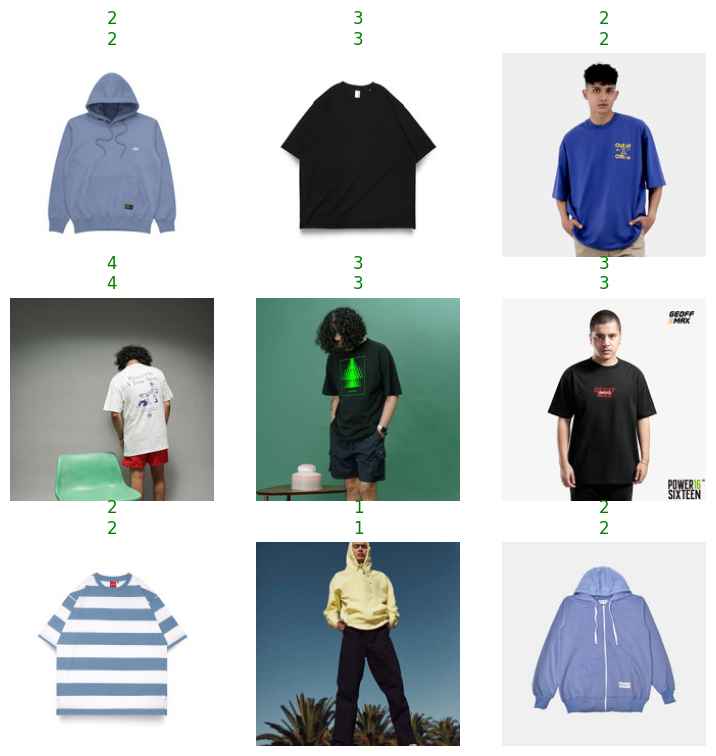

In [52]:
learn.show_results()

In [65]:
learn.unfreeze()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.035709,0.386180,0.980645,00:03
1,0.019055,0.397091,0.980645,00:03
2,0.031884,0.404368,0.974194,00:03
3,0.034159,2.552979,0.941935,00:04
4,0.136174,0.875734,0.967742,00:03
5,0.163380,0.185272,0.987097,00:03
6,0.128611,0.000394,1.000000,00:03
7,0.121054,0.001265,1.000000,00:03
8,0.124194,0.012128,0.993548,00:03
9,0.113042,0.000048,1.000000,00:03


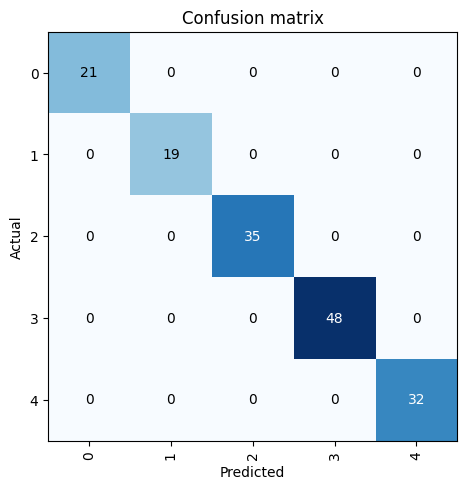

In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

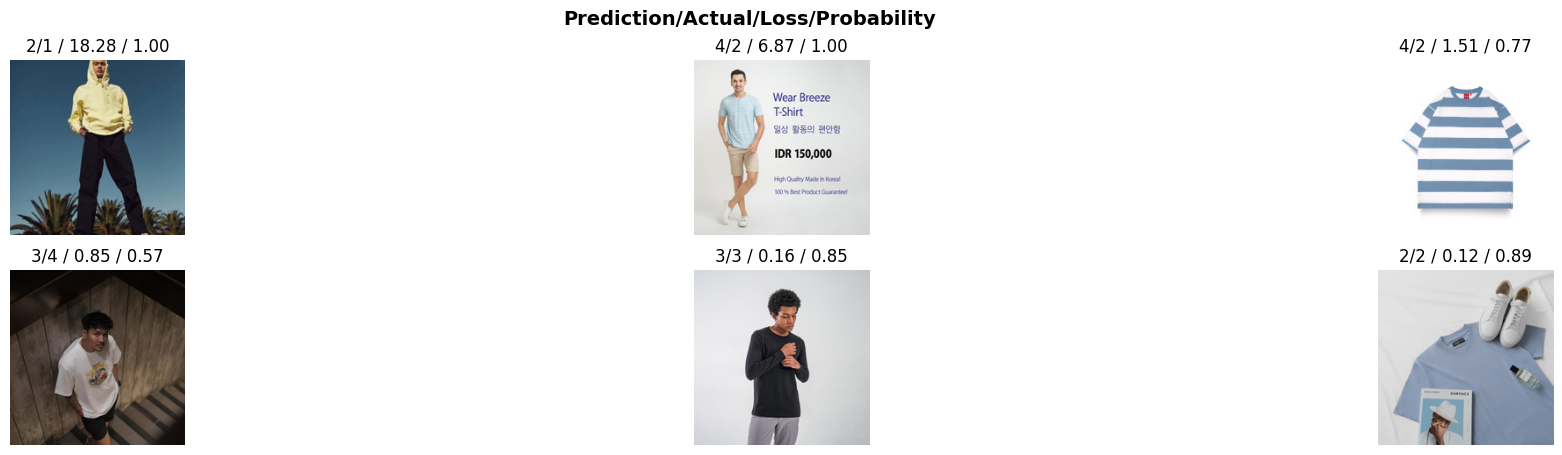

In [61]:
interp.plot_top_losses(6,figsize = (25,5))

In [33]:
import cv2

img = PILImage.create('/kaggle/input/hology/Penyisihan Hology Data Mining/test/794.jpg')
print(learn.predict(img)[0])

1
